#a. Simulation of Multivariate Normal Distribution

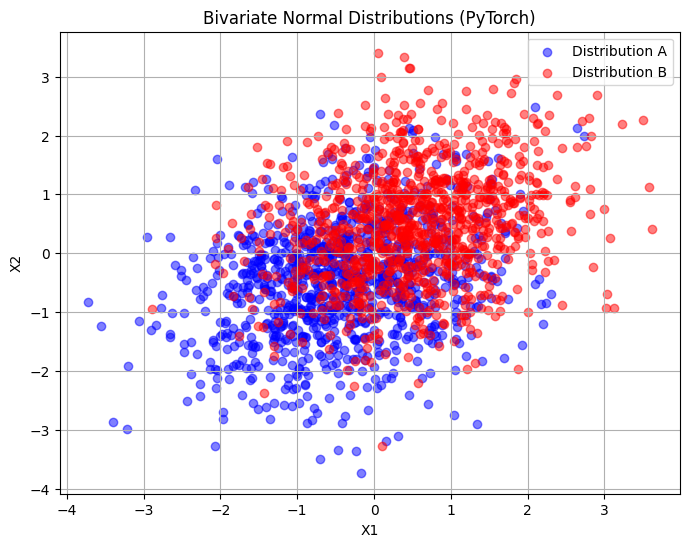

Shape of tensor X: torch.Size([2000, 2])


In [81]:
import torch
import matplotlib.pyplot as plt

# mean and covariance for set A
mean_A = torch.tensor([-0.5, -0.5])
cov_A = torch.tensor([[1, 0.25], [0.25, 1]])

# mean and covariance for set B
mean_B = torch.tensor([0.5, 0.5])
cov_B = torch.tensor([[1, 0.25], [0.25, 1]])

# m is to be set 1000 for each
m = 1000

# generating 1000 samples for each set
dist_A = torch.distributions.MultivariateNormal(mean_A, cov_A)
samples_A = dist_A.sample((m,))

dist_B = torch.distributions.MultivariateNormal(mean_B, cov_B)
samples_B = dist_B.sample((m,))

# plotting the samples
plt.figure(figsize=(8, 6))
plt.scatter(samples_A[:, 0].numpy(), samples_A[:, 1].numpy(), color='blue', label='Distribution A', alpha=0.5)
plt.scatter(samples_B[:, 0].numpy(), samples_B[:, 1].numpy(), color='red', label='Distribution B', alpha=0.5)
plt.title('Bivariate Normal Distributions (PyTorch)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


X = torch.vstack((samples_A, samples_B))

print(f"Shape of tensor X: {X.shape}")


#b. K-Means Clustering

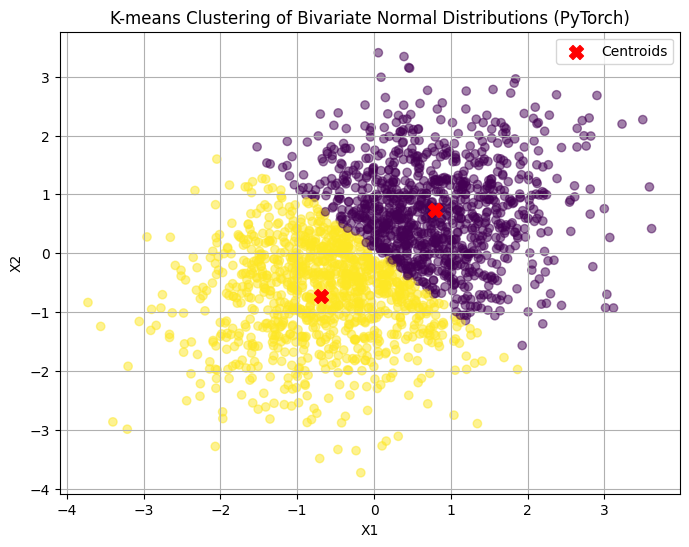

Centroids:
tensor([[ 0.7983,  0.7313],
        [-0.6914, -0.7301]])
Cluster Labels:
tensor([1, 1, 1,  ..., 0, 0, 1])


In [82]:
import torch
import matplotlib.pyplot as plt

# we can say that the shape is [2000,2] from previous chart
k = 2
num_iterations = 100

# initializing the centroids first
centroids = X[torch.randperm(X.shape[0])[:k]]

# calculating the distance for the centroid
for i in range(num_iterations):

    # calculating the distance of each point to the centroids
    distances = torch.cdist(X, centroids)
    cluster_labels = torch.argmin(distances, dim=1)

    # calculating the centroids using the mean
    new_centroids = torch.stack([X[cluster_labels == j].mean(dim=0) for j in range(k)])

    if torch.allclose(centroids, new_centroids, atol=1e-6):
        break

    centroids = new_centroids

# plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), c=cluster_labels.numpy(), cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0].numpy(), centroids[:, 1].numpy(), color='red', marker='X', s=100, label='Centroids')
plt.title("K-means Clustering of Bivariate Normal Distributions (PyTorch)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

print(f"Centroids:\n{centroids}")
print(f"Cluster Labels:\n{cluster_labels}")


#c. Projection with Principal Components Analysis (PCA)

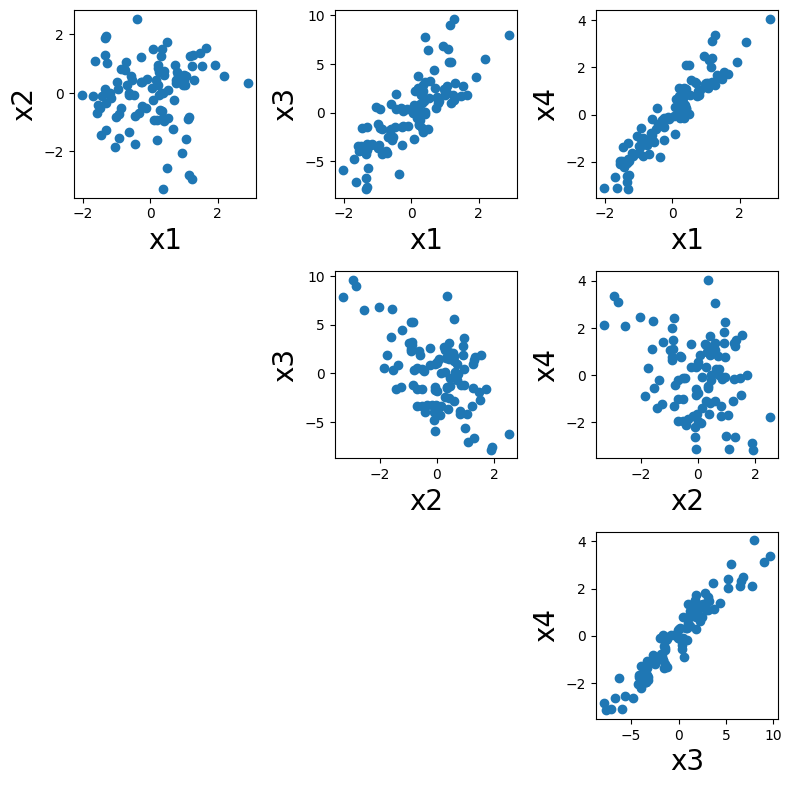

In [83]:
import torch
import matplotlib.pyplot as plt

# generating some data using torch
X = torch.randn(100, 4)

X[:, 2] = 3 * X[:, 0] - 2 * X[:, 1] + torch.randn(100) * 0.1
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + torch.randn(100) * 0.1

# checking for aall the features for 0 mean
X -= torch.mean(X, dim=0)

# plotting the data
plt.figure(figsize=(10, 10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i * 4 + j + 1)
            plt.scatter(X[:, i].numpy(), X[:, j].numpy())
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()
plt.show()


Observations are exactly same as the one in the video provided:
- x1 and x2 do not seem correlated
- x1 seems very correlated with both x3 and x4
- x2 seems somewhat correlated with both x3 and x4
- x3 and x4 seem very correlated

# Showing a Comparison between Torch and SKlearn Approach for reference

In [84]:
import torch

cov_matrix = torch.matmul(X.T, X) / X.size(0)

# computing eigenvalues and eigenvectors of the covariance using torch library
eigvals, eigvecs = torch.linalg.eigh(cov_matrix)

# sorting eigenvalues in descending order
ordering = torch.argsort(eigvals, descending=True)
principal_comps_byhand = eigvecs[:, ordering]

principal_comps_byhand


tensor([[-0.2033,  0.4864, -0.1849,  0.8294],
        [ 0.1420,  0.7959, -0.3090, -0.5009],
        [-0.8926, -0.1266, -0.3685, -0.2268],
        [-0.3765,  0.3375,  0.8571, -0.0991]])

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X)
PCA(n_components=4)
principal_comps_builtin = pca.components_.T
principal_comps_builtin

array([[ 0.20334449, -0.48642279,  0.18494614, -0.82936048],
       [-0.14198047, -0.79592395,  0.30894912,  0.50089625],
       [ 0.89260348,  0.1265522 ,  0.36851442,  0.22680541],
       [ 0.37649913, -0.33746477, -0.85705454,  0.09911329]])